In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Energy change due to flipping site i is (with $J=1$)
\begin{equation}
\delta E_i = E_f - E_i = -(\sum_{j=\mathrm{n.n.}}  s_j (-s_i)) - (- \sum_{j=\mathrm{n.n.}} s_j s_i) = 2 \sum_{j=\mathrm{n.n.}} s_j s_i
\end{equation}
where the sum over j is just over nearest neighbours.

# Monte Carlo simulation of Ising model

In [2]:
# in my version I pass the temperature, T, the initial configuration, sij, the # of sweeps Nsweep, 
# the # of equilibrium sweeps to do, Neq and how often to sample, Nsamp

def metropolis(T, sij, Nsweep, Neq, Nsamp):
    
    L = shape(sij)[0]   # size of grid, L x L
    N = L**2
    
    Ms = []     # store magentizations
    Es = []     # store energies

    # calculate initial total energy
    E0 = 0.0
    for ii in range(L):
        for jj in range(L):
            # PBC
            iL   = (ii, jj - 1)
            iR = (ii, (jj + 1) % L)
            iT    = (ii - 1, jj)
            iB = ((ii + 1) % L, jj)       
            E0 += -0.5*sij[ii,jj]*(sij[iL[0],iL[1]] + sij[iR[0],iR[1]] + sij[iT[0],iT[1]] + sij[iB[0],iB[1]])

    for i in range(Nsweep):
        
        for j in range(N):    # do the sweep
            ii = int(L*random.random())
            jj = int(L*random.random())  # pick random site
            
            # PBC
            iL   = (ii, jj - 1)
            iR = (ii, (jj + 1) % L)
            iT    = (ii - 1, jj)
            iB = ((ii + 1) % L, jj)
            
            dE = 2.0*sij[ii,jj]*(sij[iL[0],iL[1]] + sij[iR[0],iR[1]] + sij[iT[0],iT[1]] + sij[iB[0],iB[1]])
            
            if dE <= 0:   # accept move
                # flip spin
                sij[ii,jj] *= -1.0
                E0 += dE  # update energy
            else:
                if random.random() <= exp(-dE/T): # accept move
                    sij[ii,jj] *= -1.0
                    E0 += dE  # update energy
            
        if i > Neq:    # take samples after system has 'equilibrated' by Neq sweeps
            if i % Nsamp == 0:
                Es.append(E0)
            # calc statistics
                mi = sum(sij)
                Ms.append(mi)
    Es = array(Es)
    Ms = array(Ms)
    return Es, Ms

In [3]:
# generate simulation

In [4]:
Ms_ran = {}
Es_ran = {}

Ls = [4, 8, 16]   # i'm lazy
Ts = array([1.5, 2.0, 2.1, 2.2, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3, 2.4, 2.5, 3.0 ])

for L in Ls:
    Ms_ran[L] = {}
    Es_ran[L] = {}
    for T in Ts:
        print('doing', L, T)
        sij = random.choice([-1.0, 1.0], size=(L,L))
        Es_ran[L][T], Ms_ran[L][T] = metropolis(T, sij, 300*50 + 200, 200,  50)

doing 4 1.5
doing 4 2.0
doing 4 2.1
doing 4 2.2
doing 4 2.25
doing 4 2.26
doing 4 2.27
doing 4 2.28
doing 4 2.29
doing 4 2.3
doing 4 2.4
doing 4 2.5
doing 4 3.0
doing 8 1.5
doing 8 2.0
doing 8 2.1
doing 8 2.2
doing 8 2.25
doing 8 2.26
doing 8 2.27
doing 8 2.28
doing 8 2.29
doing 8 2.3
doing 8 2.4
doing 8 2.5
doing 8 3.0
doing 16 1.5
doing 16 2.0
doing 16 2.1
doing 16 2.2
doing 16 2.25
doing 16 2.26
doing 16 2.27
doing 16 2.28
doing 16 2.29
doing 16 2.3
doing 16 2.4
doing 16 2.5
doing 16 3.0


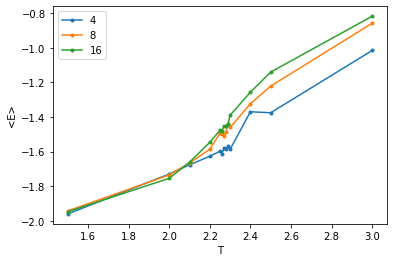

In [8]:
#energy/spin
for L in Ls:
    Nspin = L*L
    plot(Ts, [mean(Es_ran[L][T])/Nspin for T in Ts], '.-')
legend(Ls, loc=0)
ylabel('<E>');
xlabel('T');

Text(0.5, 0, 'T')

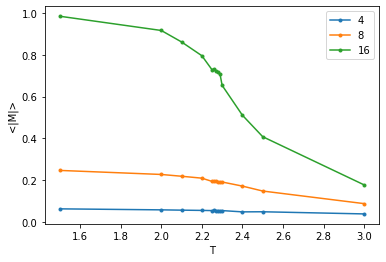

In [9]:
#magnetization
for L in Ls:
    Nsping = L*L
    plot(Ts, array([mean(abs(Ms_ran[L][T])) for T in Ts])/Nspin, '.-')
legend(Ls, loc=0)
ylabel('<|M|>');
xlabel('T')

Text(0.5, 0, 'T')

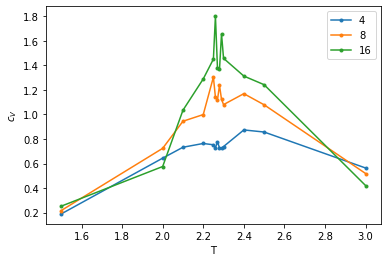

In [10]:
# heat capacity  Cv/N = (<E^2> - <E>^2)/T^2/N
cv = {}
for L in Ls:
    Nspin = L*L
    cv[L] = array([ (mean(Es_ran[L][T]**2) - mean(Es_ran[L][T])**2)/T/T/Nspin for T in Ts])
    plot(Ts, cv[L],'.-')
legend(Ls, loc=0)
ylabel(r'$c_V$')
xlabel('T')

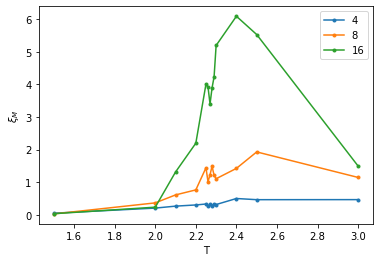

In [13]:
# susceptibility
xim = {}
for L in Ls:
    Nspin = L*L
    xim[L] = array([ (mean(Ms_ran[L][T]**2) - mean(abs(Ms_ran[L][T]))**2)/T/Nspin for T in Ts])
    plot(Ts, xim[L],'.-')
legend(Ls, loc=0)
ylabel(r'$\xi_M$')
xlabel('T');

In [14]:
binder={}
for L in Ls:
    binder[L] = []
    for T in Ts:
        binder[L].append(1.5*(1.0 - 1.0*mean(Ms_ran[L][T]**4)/(mean(Ms_ran[L][T]**2)**2)/3.0))


Text(0.5, 0, 'T')

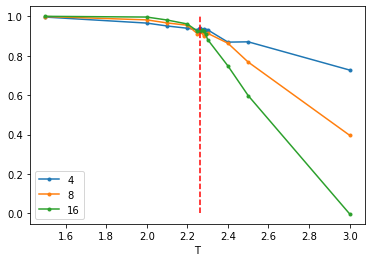

In [17]:

for L in Ls:
    plot(Ts, binder[L], '.-')
legend(Ls, loc=0)
plot([2.26, 2.26], [0,1],'r--')
xlabel('T')

# Finite size scaling (not graded)

All the data around the critical point at different L should collapse onto a single curve if rescaled properly.  This rescaling involves the critical exponents that characterize how the different quantities diverge at the critical temperature.  It also involves transforming and rescaling the temperatures.

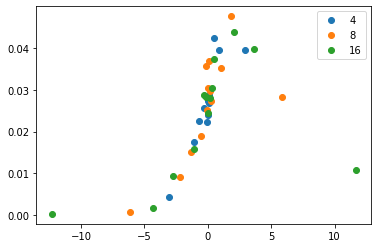

In [18]:
# rescaled susceptibility
Tc = 2.27
gamma = 1.78
nu = 1.

for L in Ls:
    xim[L] = array([ (mean(Ms_ran[L][T]**2) - mean(abs(Ms_ran[L][T]))**2)/T for T in Ts])/L/L
    plot(L**(1./nu)*(Ts-Tc), xim[L]/L**(gamma/nu),'o')
legend(Ls, loc=0)

The data nicely collapses with the correct choice of Tc, and critical exponents.  If we use the wrong Tc or critical exponents, the data doesn't collapse.

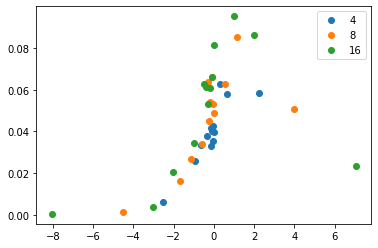

In [23]:
# rescaled susceptibility
# use wrong critical exponents
Tc = 2.3
gamma = 1.8
nu = 1.2

for L in Ls:
    xim[L] = array([ (mean(Ms_ran[L][T]**2) - mean(abs(Ms_ran[L][T]))**2)/T for T in Ts])/L/L
    plot(L**(1./nu)*(Ts-Tc), xim[L]/L**(gamma/nu),'o')
legend(Ls, loc=0)